In [205]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import log_loss
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier, HistGradientBoostingClassifier


import sys
sys.path.append('../')

from src.bet_sizing import SimultaneousKelly

In [206]:
train_df = pd.read_csv("../data/processed/train.csv").drop(columns=["BOUT_ID", "EVENT_ID", "DATE", "BOUT_ORDINAL"])
test_df = pd.read_csv("../data/processed/test.csv").drop(columns=["BOUT_ID", "EVENT_ID", "DATE", "BOUT_ORDINAL"])

test_df = test_df.loc[test_df["RED_WIN"].notnull()]

In [207]:
X_train = train_df.drop(columns=["RED_WIN"])
y_train = train_df["RED_WIN"]
X_test = test_df.drop(columns=["RED_WIN"])
y_test = test_df["RED_WIN"]

In [208]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

In [209]:
# clf = HistGradientBoostingClassifier(max_depth=2, random_state=0, l2_regularization=0.2, max_leaf_nodes=7)
clf = GradientBoostingClassifier(max_depth=2, random_state=0, n_estimators=100, max_features="sqrt")
clf.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=2, max_features='sqrt', random_state=0)

In [210]:
y_pred_train = clf.predict_proba(X_train)[:, 1]
log_loss(y_train, y_pred_train) # type: ignore

0.595024528679359

In [211]:
y_pred_test = clf.predict_proba(X_test)[:, 1] # type: ignore
log_loss(y_test, y_pred_test) # type: ignore

0.6264275169061493

In [212]:
from sklearn.calibration import CalibrationDisplay

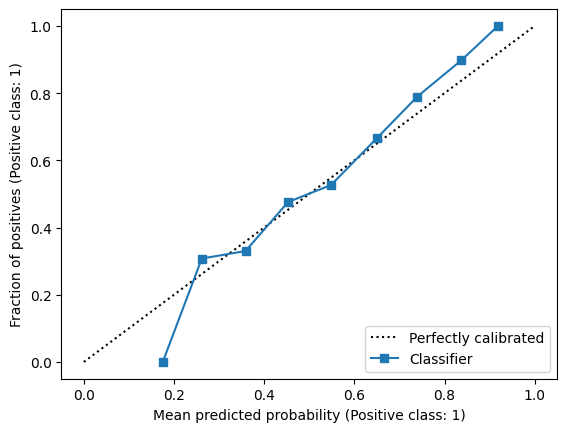

In [213]:
disp = CalibrationDisplay.from_predictions(y_test, y_pred_test, n_bins=10)

In [24]:
import h2o
from h2o.automl import H2OAutoML

In [25]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,30 mins 55 secs
H2O_cluster_timezone:,America/New_York
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.1
H2O_cluster_version_age:,"21 days, 6 hours and 40 minutes"
H2O_cluster_name:,H2O_from_python_eugene_5il6hi
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.064 Gb
H2O_cluster_total_cores:,16
H2O_cluster_allowed_cores:,16
H2O_cluster_status:,"locked, healthy"


In [27]:
# h2o.cluster().shutdown()

In [9]:
data = h2o.import_file("../data/processed/train.csv")
data = data.drop(["BOUT_ID", "EVENT_ID", "DATE", "BOUT_ORDINAL"])
data["RED_WIN"] = data["RED_WIN"].asfactor()
data.head()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


FIGHTMATRIX_ELO_DIFF,FIGHTMATRIX_ELO_RATIO,FIGHTMATRIX_ELO_AVERAGE_DIFF,FIGHTMATRIX_ELO_AVERAGE_RATIO,FIGHTMATRIX_ELO_CHANGE_PREV_DIFF,FIGHTMATRIX_ELO_CHANGE_AVERAGE_DIFF,FIGHTMATRIX_OPPONENT_ELO_AVERAGE_DIFF,FIGHTMATRIX_OPPONENT_ELO_AVERAGE_RATIO,FIGHTMATRIX_GLICKO1_DIFF,FIGHTMATRIX_GLICKO1_AVERAGE_RATIO,FIGHTMATRIX_GLICKO1_CHANGE_PREV_DIFF,FIGHTMATRIX_GLICKO1_CHANGE_AVERAGE_DIFF,RED_WIN,FIGHTMATRIX_RANKING_POINTS_DIFF,FIGHTMATRIX_RANKING_POINTS_RATIO,FIGHTMATRIX_RANKING_POINTS_AVERAGE_DIFF,FIGHTMATRIX_RANKING_POINTS_AVERAGE_RATIO,FIGHTODDSIO_ODDS_AVERAGE_DIFF,FIGHTODDSIO_OPPONENT_ODDS_AVERAGE_DIFF,FIGHTODDSIO_IMPLIED_PROB_AVERAGE_DIFF,FIGHTODDSIO_WIN_FAVORITE_RATE_DIFF,FIGHTODDSIO_WIN_UNDERDOG_RATE_DIFF,FIGHTODDSIO_LOSE_FAVORITE_RATE_DIFF,FIGHTODDSIO_LOSE_UNDERDOG_RATE_DIFF,FIGHTODDSIO_ROI_AVERAGE_DIFF,SHERDOG_AGE_DAYS_DIFF,SHERDOG_AGE_DAYS_AVERAGE_DIFF,SHERDOG_DAYS_SINCE_DEBUT_DIFF,SHERDOG_DAYS_SINCE_LAST_FIGHT_AVERAGE_DIFF,SHERDOG_WINS_DIFF,SHERDOG_WIN_RATE_DIFF,SHERDOG_LOSS_RATE_BY_KO_TKO_DIFF,SHERDOG_LOSS_RATE_BY_SUBMISSION_DIFF,SHERDOG_LOSS_RATE_BY_DECISION_DIFF,SHERDOG_TOTAL_FIGHTS_DIFF,SHERDOG_TIME_SECONDS_FOUGHT_DIFF,SHERDOG_WINNING_STREAK_DIFF,SHERDOG_LOSING_STREAK_DIFF,SHERDOG_WINNING_STREAK_AVERAGE_DIFF,SHERDOG_LOSING_STREAK_AVERAGE_DIFF,SHERDOG_WINNING_STREAK_MAX_DIFF,SHERDOG_LOSING_STREAK_MAX_DIFF,UFCSTATS_REACH_INCHES_DIFF,UFCSTATS_REACH_INCHES_RATIO,UFCSTATS_ELEVATION_METERS_AVERAGE_DIFF,UFCSTATS_ELEVATION_METERS_MAX_RATIO,UFCSTATS_PERF_BONUSES_DIFF,UFCSTATS_SIGNIFICANT_STRIKES_EXPECTED_ACCURACY_DIFF,UFCSTATS_OPPONENT_SIGNIFICANT_STRIKES_LANDED_PER_MIN_DIFF,UFCSTATS_OPPONENT_SIGNIFICANT_STRIKES_LEG_LANDED_PER_MIN_DIFF,UFCSTATS_CONTROL_TIME_SECONDS_PER_GROUND_EXCHANGE
97,1.06078,72.5,1.04574,60,-11,-108.5,0.938527,127,1.07895,42,-41.5,0,35,1.36458,12,1.125,-1.06336,0.40871,0.147801,0.5,0,0,-0.5,0.887644,3479,3111.53,1974,81.62,-3,-0.0876923,0.04,0.121538,-0.113846,-1,-2807,1,-1,-0.853846,0.0876923,-2,1,3,1.04225,121,1.64021,0,-0.0759798,-0.301629,0.128773,80.2222
0,1,-36,0.976401,-24,27.25,25,1.01652,-96,0.919627,-51,33.5,1,-20,0.733333,-10,0.818182,-0.962723,0.588953,0.160067,0.25,0,0,-0.25,0.318943,-142,726.09,-3799,-118.925,-8,0.120301,0.037594,-0.157895,0,-12,213,-1,0,0.12782,-0.278195,-1,-2,-5,0.934211,-254,0.38871,0,0.0217914,1.62578,-0.321332,-15.75
-31,0.979818,93,1.06793,-26,48.8333,-196.833,0.879833,-87,1.15917,-50,45,1,-3,0.953846,-24.8333,0.617949,-3.09691,1.42534,0.390116,0.666667,0,0.166667,-0.833333,1.04366,1434,1207.14,302,-9.89474,3,-0.0676692,0.0338346,-0.0714286,0.105263,5,4168,-8,1,-1.07519,-0.0037594,-2,-1,0,1,-159.833,1,2,0.082355,-0.320165,0.56196,26.3
103,1.06586,41.5,1.02544,-32,87.25,-85.5,0.949498,102,1.041,-60,72.375,1,55,1.76389,22.125,1.30729,-1.00408,1.44729,0.266208,0.714286,0,0.142857,-0.857143,1.04693,-589,-1389.29,1687,57.0111,6,-0.0666667,0.166667,0,-0.1,8,-285,0,0,-1.27778,0.0666667,0,0,1,1.01408,-355.875,1,1,0.0750188,0.761299,-0.0159434,-31.4872
299,1.20189,359.2,1.25916,-110,-74.9,97.6,1.06434,331,1.27479,-133,-95.6,1,74,2.04225,94.3,3.07253,-0.595642,0.99758,0.175176,0.8,-1,0,0.2,-1.09764,-1852,-744.483,-2114,-40.7206,-4,0.203782,-0.142857,-0.142857,0.0819328,-11,1082,1,0,1.35504,-0.310924,2,-1,1,1.01429,-81.5,1,1,-0.0954475,-0.185713,-0.467415,-5.38889
130,1.08286,11.0238,1.00709,-31,59.6905,1.40476,1.00091,155,1.02279,-15,64.4524,0,24,1.26667,6.80952,1.12644,0.172221,1.06748,0.0496361,0.333333,0.166667,-0.5,0,1.02634,-29,-90.1318,-259,-22.6864,4,0.118182,0.0909091,-0.00909091,-0.15,2,-4430,1,0,0.218182,-0.118182,-1,-1,1,1.01429,225.214,2.6371,3,0.112835,-1.28779,-0.634029,-88.3214
-75,0.957579,-171,0.897605,-40,-59.1429,-241.143,0.863453,-112,0.879573,-39,-70,0,-41,0.760234,-109.286,0.360902,-1.32711,0.676939,0.20053,0.333333,-0.5,0,0.166667,-2.05045,-1163,-1093.53,-482,41.8206,-9,0.0725806,0.0927419,-0.0987903,-0.00201613,-15,-8844,-2,0,0.00403226,-0.0403226,-2,-1,0,1,240.857,4.10596,3,-0.0726213,-2.47655,0.439815,78.25
91,1.05078,62.6,1.03643,-115,-12.6667,78.6333,1.

In [10]:
y = "RED_WIN"
x = data.columns
x.remove(y)

In [13]:
lb_frame = h2o.import_file("../data/processed/test.csv")
lb_frame = lb_frame.drop(["BOUT_ID", "EVENT_ID", "DATE", "BOUT_ORDINAL"])
lb_frame["RED_WIN"] = lb_frame["RED_WIN"].asfactor()
lb_frame.head()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


FIGHTMATRIX_ELO_DIFF,FIGHTMATRIX_ELO_RATIO,FIGHTMATRIX_ELO_AVERAGE_DIFF,FIGHTMATRIX_ELO_AVERAGE_RATIO,FIGHTMATRIX_ELO_CHANGE_PREV_DIFF,FIGHTMATRIX_ELO_CHANGE_AVERAGE_DIFF,FIGHTMATRIX_OPPONENT_ELO_AVERAGE_DIFF,FIGHTMATRIX_OPPONENT_ELO_AVERAGE_RATIO,FIGHTMATRIX_GLICKO1_DIFF,FIGHTMATRIX_GLICKO1_AVERAGE_RATIO,FIGHTMATRIX_GLICKO1_CHANGE_PREV_DIFF,FIGHTMATRIX_GLICKO1_CHANGE_AVERAGE_DIFF,RED_WIN,FIGHTMATRIX_RANKING_POINTS_DIFF,FIGHTMATRIX_RANKING_POINTS_RATIO,FIGHTMATRIX_RANKING_POINTS_AVERAGE_DIFF,FIGHTMATRIX_RANKING_POINTS_AVERAGE_RATIO,FIGHTODDSIO_ODDS_AVERAGE_DIFF,FIGHTODDSIO_OPPONENT_ODDS_AVERAGE_DIFF,FIGHTODDSIO_IMPLIED_PROB_AVERAGE_DIFF,FIGHTODDSIO_WIN_FAVORITE_RATE_DIFF,FIGHTODDSIO_WIN_UNDERDOG_RATE_DIFF,FIGHTODDSIO_LOSE_FAVORITE_RATE_DIFF,FIGHTODDSIO_LOSE_UNDERDOG_RATE_DIFF,FIGHTODDSIO_ROI_AVERAGE_DIFF,SHERDOG_AGE_DAYS_DIFF,SHERDOG_AGE_DAYS_AVERAGE_DIFF,SHERDOG_DAYS_SINCE_DEBUT_DIFF,SHERDOG_DAYS_SINCE_LAST_FIGHT_AVERAGE_DIFF,SHERDOG_WINS_DIFF,SHERDOG_WIN_RATE_DIFF,SHERDOG_LOSS_RATE_BY_KO_TKO_DIFF,SHERDOG_LOSS_RATE_BY_SUBMISSION_DIFF,SHERDOG_LOSS_RATE_BY_DECISION_DIFF,SHERDOG_TOTAL_FIGHTS_DIFF,SHERDOG_TIME_SECONDS_FOUGHT_DIFF,SHERDOG_WINNING_STREAK_DIFF,SHERDOG_LOSING_STREAK_DIFF,SHERDOG_WINNING_STREAK_AVERAGE_DIFF,SHERDOG_LOSING_STREAK_AVERAGE_DIFF,SHERDOG_WINNING_STREAK_MAX_DIFF,SHERDOG_LOSING_STREAK_MAX_DIFF,UFCSTATS_REACH_INCHES_DIFF,UFCSTATS_REACH_INCHES_RATIO,UFCSTATS_ELEVATION_METERS_AVERAGE_DIFF,UFCSTATS_ELEVATION_METERS_MAX_RATIO,UFCSTATS_PERF_BONUSES_DIFF,UFCSTATS_SIGNIFICANT_STRIKES_EXPECTED_ACCURACY_DIFF,UFCSTATS_OPPONENT_SIGNIFICANT_STRIKES_LANDED_PER_MIN_DIFF,UFCSTATS_OPPONENT_SIGNIFICANT_STRIKES_LEG_LANDED_PER_MIN_DIFF,UFCSTATS_CONTROL_TIME_SECONDS_PER_GROUND_EXCHANGE
-98,0.932831,-108.424,0.92777,78,-33.1515,-124.152,0.920964,-92,0.952815,35,-49.7273,1,-49,0.449438,-30.0606,0.580904,-0.127747,-0.129686,-0.0023586,-0.272727,0.151515,0.151515,-0.030303,-0.102346,-1365,-987.211,-442,-41.5935,1,-0.0478261,0.0804348,0.130435,-0.163043,3,-1510,1,-1,-1.15217,0.134783,-5,1,3,1.04348,-41.5758,0.275678,-1,0.0313109,-0.357226,0.230546,0.0583333
135,1.08882,159.417,1.10536,86,-30.5833,-59.5833,0.964279,164,1.12391,83,-38.8333,1,45,1.52941,40.75,1.37385,-1.25552,0.512276,0.140957,0.166667,0.416667,0.0833333,-0.166667,0.822909,330,513.514,-762,-21.7714,2,0.0571429,-0.0857143,0.0571429,0,0,1569,1,-1,-0.571429,0,-4,1,-7,0.90411,-344.083,1,3,0.116362,1.499,0.350192,-0.821429
202,1.14057,245,1.17747,45,-15.4444,176.833,1.12083,228,1.17571,62,-7.33333,1,98,2.84906,60.2778,2.36995,0.0457146,0.00349969,-0.00340947,-0.166667,0.166667,0.277778,-0.277778,0.111324,2897,777.817,2766,-39.75,11,-0.0833333,-0.05,0,0.133333,18,17349,0,0,0.133333,0.25,2,2,3,1.04167,-336.611,2.11613,1,0.0263617,-1.35414,-0.25169,50.7917
124,1.07447,18.044,1.0112,7,15.2637,-4.34066,0.997247,112,1.00936,17,15.2527,1,40,1.36697,4.45055,1.05066,-0.873576,0.193926,0.0579362,0.175824,-0.0549451,0.153846,-0.274725,0.236621,-83,886.535,-1666,-25.9519,-3,0.0962963,0.062963,-0.037037,-0.0851852,-7,-3565,0,0,0.45,-0.0592593,1,0,4,1.0625,-164.791,1.25537,-1,0.0156779,0.399045,0.631689,-200.867
-37,0.977549,1.55,1.00095,-147,10.9,81.55,1.04975,-31,0.99639,-141,18.4,1,11,1.10784,31.6,1.35747,-0.0713298,-0.0387179,-0.00784979,-0.2,0.3,0,0.1,-0.10003,-113,209.405,232,38.3333,-4,-0.0952381,0.00793651,0.00793651,0.174603,-3,-802,0,2,-1.68254,0.198413,-6,0,1,1.01493,12.55,0.389447,0,-0.0581839,-0.313613,0.565558,-61.8333
74,1.05219,74.8667,1.05284,65,7.34444,1.06667,1.0007,44,1.02558,98,10.7778,1,12,1.2449,4.84444,1.10862,0.361969,-0.298291,-0.0741994,-0.3,0.444444,0.0222222,-0.166667,0.658742,379,-361.727,1156,99.4758,-3,0.0144928,-0.00724638,0.0555556,-0.0628019,-5,379,0,-1,-0.207729,-0.231884,0,-2,0,1,-113.556,0.554116,1,-0.00884428,-1.8848,-0.223417,-4.75
61,1.03273,334.905,1.22823,-160,-63.0476,196.73,1.12057,57,1.22759,-182,-58.5397,1,39,1.08705,127.81,1.71062,0.406727,-0.853419,-0.0788004,0.015873,-0.349206,0,0.333333,-0.449233,152,-1887.66,3100,58.287,8,-0.0601852,0,-0

In [15]:
aml = H2OAutoML(max_models=20, seed=42, nfolds=5, stopping_metric="logloss", sort_metric="logloss", exclude_algos=["DeepLearning"])

aml.train(x=x, y=y, training_frame=data)

AutoML progress: |
21:47:55.704: AutoML: XGBoost is not available; skipping it.

███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_1_AutoML_3_20240403_214755


GLM Model: summary
    family    link    regularization              lambda_search                                                                 number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  ------  --------------------------  ----------------------------------------------------------------------------  ----------------------------  -----------------------------  ----------------------  -----------------------------------------------
    binomial  logit   Ridge ( lambda = 0.04884 )  nlambda = 30, lambda.max = 9.2181, lambda.min = 0.04884, lambda.1se = 0.3284  50                            50                             24                      AutoML_3_20240403_214755_training_py_8_sid_b006

ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.22056413551154957
RMSE: 0.4696425614353426
LogLoss: 0.6315373147629363
AUC: 0.6825114344156158
AUCPR: 0.7293797613584622
Gini: 0.3650228688312316
Null degrees of freedom: 3862
Residual degrees of freedom: 3812
Null deviance: 5266.3228897495555
Residual deviance: 4879.257293858445
AIC: 4981.257293858445

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.42539148995438525
       0    1     Error    Rate
-----  ---  ----  -------  ---------------
0      412  1227  0.7486   (1227.0/1639.0)
1      189  2035  0.085    (189.0/2224.0)
Total  601  3262  0.3666   (1416.0/3863.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.425391     0.741888  301
max f2                       0.195855     0.871696  393
max f0point5                 0.543234     0.686515  218
max accuracy                 0.482472     0.649236  262
max precision                0.958133     1         0
max recall                   0.135151     1         399
max specificity              0.958133     1         0
max absolute_mcc             0.618556     0.263971  162
max min_per_class_accuracy   0.57392      0.626602  195
max mean_per_class_accuracy  0.588093     0.632462  184
max tns                      0.958133     1639      0
max fns                      0.958133     2223      0
max fps                      0.150268     1639      398
max tps                      0.135151     2224      399
max tnr                      0.958133     1         0
max fnr                      0.958133     0.99955   0
max fpr                      0.150268     1         398
max tpr                      0.135151     1         399

Gains/Lift Table: Avg response rate: 57.57 %, avg score: 57.57 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score     cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain       cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  --------  --------------------------  ------------------  --------------  -------------------------  ---------  -----------------  --------------------
1        0.0100958                   0.872738           1.51427   1.51427            0.871795         0.89751   0.871795                    0.89751             0.0152878       0.0152878                  51.4273    51.4273            0.0122371
2        0.0201916                   0.849703           1.51427   1.51427            0.871795         0.86164   0.871795                    0.879575            0.0152878       0.0305755                  51.4273    51.4273            0.0244743
3        0.0300285                   0.833712           1.4627    1.49738            0.842105         0.842101  0.862069                    0.867299            0.0143885       0.044964                   46.2704    49.

In [16]:
aml.leaderboard

model_id,logloss,auc,aucpr,mean_per_class_error,rmse,mse
GLM_1_AutoML_3_20240403_214755,0.63781,0.671585,0.717044,0.44445,0.472535,0.223289
StackedEnsemble_BestOfFamily_1_AutoML_3_20240403_214755,0.637876,0.670641,0.717133,0.431896,0.472682,0.223428
StackedEnsemble_AllModels_1_AutoML_3_20240403_214755,0.638688,0.668795,0.714694,0.452879,0.473065,0.223791
GBM_1_AutoML_3_20240403_214755,0.644229,0.656904,0.707095,0.439683,0.475876,0.226458
GBM_grid_1_AutoML_3_20240403_214755_model_6,0.645232,0.655441,0.700431,0.460008,0.476241,0.226806
GBM_grid_1_AutoML_3_20240403_214755_model_7,0.647115,0.651437,0.701768,0.442862,0.477226,0.227744
GBM_grid_1_AutoML_3_20240403_214755_model_12,0.653281,0.642836,0.698952,0.470717,0.480152,0.230546
GBM_2_AutoML_3_20240403_214755,0.653392,0.642222,0.695549,0.453827,0.480153,0.230547
GBM_grid_1_AutoML_3_20240403_214755_model_1,0.653763,0.643913,0.687423,0.463556,0.47997,0.230371
GBM_5_AutoML_3_20240403_214755,0.654722,0.63898,0.687868,0.482869,0.480724,0.231095


In [22]:
temp = h2o.get_model("GBM_1_AutoML_3_20240403_214755")
temp

Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_1_AutoML_3_20240403_214755


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    23                 23                          8182                   6            15           9.04348       22            26            23.5652

ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.19395150732781605
RMSE: 0.44039925900007604
LogLoss: 0.573976054158326
Mean Per-Class Error: 0.3158788862747508
AUC: 0.7939816237309116
AUCPR: 0.8347339719528398
Gini: 0.5879632474618233

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.48214011441072707
       0     1     Error    Rate
-----  ----  ----  -------  ---------------
0      790   849   0.518    (849.0/1639.0)
1      253   1971  0.1138   (253.0/2224.0)
Total  1043  2820  0.2853   (1102.0/3863.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.48214      0.781523  269
max f2                       0.373511     0.879338  338
max f0point5                 0.596494     0.771631  181
max accuracy                 0.523108     0.723272  238
max precision                0.879531     1         0
max recall                   0.248184     1         393
max specificity              0.879531     1         0
max absolute_mcc             0.596494     0.440457  181
max min_per_class_accuracy   0.574434     0.714029  198
max mean_per_class_accuracy  0.596494     0.72259   181
max tns                      0.879531     1639      0
max fns                      0.879531     2223      0
max fps                      0.218831     1639      399
max tps                      0.248184     2224      393
max tnr                      0.879531     1         0
max fnr                      0.879531     0.99955   0
max fpr                      0.218831     1         399
max tpr                      0.248184     1         393

Gains/Lift Table: Avg response rate: 57.57 %, avg score: 57.62 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score     cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  --------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100958                   0.836268           1.73696   1.73696            1                0.849455  1                           0.849455            0.017536        0.017536                   73.696    73.696             0.017536
2        0.0201916                   0.819496           1.73696   1.73696            1                0.827727  1                           0.838591            0.017536        0.0350719                  73.696    73.696             0.0350719
3        0.0300285                   0.807243           1.69125   1.72199            0.973684         0.813333  0.991379                    0.830317            0.0166367       0.0517086                  69.1251   72.1987            0.0510985
4        0.0401243                   0.796907           1.60335   1.69214            0.923077         0.801963  0.974194                    0.823183            0.0161871       0.0678957                  60.3348   69.2136            0.0654552
5        0.05022                     0.790498           1.60335   1.67429            0.923077         0.793347  0.963918                    0.817185  

In [23]:
temp.model_performance(lb_frame)

ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.2208738364692174
RMSE: 0.46997216563241
LogLoss: 0.6309437224459794
Mean Per-Class Error: 0.43913577718615604
AUC: 0.6785633831660863
AUCPR: 0.7474673995551724
Gini: 0.35712676633217266

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3680137202908724
       0    1    Error    Rate
-----  ---  ---  -------  -------------
0      64   316  0.8316   (316.0/380.0)
1      24   490  0.0467   (24.0/514.0)
Total  88   806  0.3803   (340.0/894.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.368014     0.742424  349
max f2                       0.253956     0.872962  394
max f0point5                 0.541339     0.682344  223
max accuracy                 0.49136      0.639821  262
max precision                0.854495     1         0
max recall                   0.253956     1         394
max specificity              0.854495     1         0
max absolute_mcc             0.605901     0.254005  169
max min_per_class_accuracy   0.564373     0.618421  204
max mean_per_class_accuracy  0.549672     0.627079  217
max tns                      0.854495     380       0
max fns                      0.854495     513       0
max fps                      0.204709     380       399
max tps                      0.253956     514       394
max tnr                      0.854495     1         0
max fnr                      0.854495     0.998054  0
max fpr                      0.204709     1         399
max tpr                      0.253956     1         394

Gains/Lift Table: Avg response rate: 57.49 %, avg score: 56.60 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score     cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  --------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0111857                   0.828347           1.7393    1.7393             1                0.840678  1                           0.840678            0.0194553       0.0194553                  73.93     73.93              0.0194553
2        0.0212528                   0.817467           1.54604   1.64776            0.888889         0.821928  0.947368                    0.831796            0.0155642       0.0350195                  54.6044   64.7758            0.0323879
3        0.0313199                   0.799481           1.54604   1.61506            0.888889         0.809607  0.928571                    0.824664            0.0155642       0.0505837                  54.6044   61.5064            0.0453205
4        0.041387                    0.790874           1.54604   1.59828            0.888889         0.79562   0.918919                    0.817599            0.0155642       0.0661479                  54.6044   59.8275            0.0582531
5        0.0514541                   0.783367           1.7393    1.62587            1                0.787478  0.934783                    0.811706            0.0175097       0.0836576                  73.93     62.5867            0.0757629
6        0.10179                     0.747982           1.50739   1.56728            0.866667         0.766353  0.901099                    0.789279            0.0758755       0.159533                   50.7393   56.7281            0.135849
7        0.151007                    0.721989           1.26495   1.46874            0.727273         0.73658   0.844444                    0.772103            0.0622568       0.22179                    26.4945   46.8742            0.166527
8        0.199105                    0.699687      

In [17]:
aml.leader.model_performance(lb_frame)

ModelMetricsBinomialGLM: glm
** Reported on test data. **

MSE: 0.2166828248150172
RMSE: 0.4654920244376021
LogLoss: 0.6206613442766233
AUC: 0.6935234486995698
AUCPR: 0.7618506707330909
Gini: 0.38704689739913967
Null degrees of freedom: 893
Residual degrees of freedom: 843
Null deviance: 1219.1884508811545
Residual deviance: 1109.7424835666025
AIC: 1211.7424835666025

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.37813932467441536
       0    1    Error    Rate
-----  ---  ---  -------  -------------
0      64   316  0.8316   (316.0/380.0)
1      21   493  0.0409   (21.0/514.0)
Total  85   809  0.377    (337.0/894.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.378139     0.745276  340
max f2                       0.279594     0.874018  380
max f0point5                 0.545617     0.699344  218
max accuracy                 0.533472     0.652125  230
max precision                0.937074     1         0
max recall                   0.207838     1         393
max specificity              0.937074     1         0
max absolute_mcc             0.545617     0.292518  218
max min_per_class_accuracy   0.552428     0.640078  212
max mean_per_class_accuracy  0.545617     0.647502  218
max tns                      0.937074     380       0
max fns                      0.937074     513       0
max fps                      0.144409     380       399
max tps                      0.207838     514       393
max tnr                      0.937074     1         0
max fnr                      0.937074     0.998054  0
max fpr                      0.144409     1         399
max tpr                      0.207838     1         393

Gains/Lift Table: Avg response rate: 57.49 %, avg score: 56.50 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score     cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  --------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0111857                   0.893336           1.7393    1.7393             1                0.915569  1                           0.915569            0.0194553       0.0194553                  73.93     73.93              0.0194553
2        0.0212528                   0.851235           1.7393    1.7393             1                0.871628  1                           0.894755            0.0175097       0.036965                   73.93     73.93              0.036965
3        0.0313199                   0.834113           1.7393    1.7393             1                0.843385  1                           0.878243            0.0175097       0.0544747                  73.93     73.93              0.0544747
4        0.0402685                   0.813751           1.7393    1.7393             1                0.824379  1                           0.866273            0.0155642       0.0700389                  73.93     73.93              0.0700389
5        0.0503356                   0.802811           1.54604   1.70065            0.888889         0.8081    0.977778                    0.854639            0.0155642       0.0856031                  54.6044   70.0649            0.0829715
6        0.098434                    0.750431           1.33481   1.52189            0.767442         0.77461   0.875                       0.815534            0.0642023       0.149805                   33.4811   52.1887            0.120858
7        0.14877                     0.714545           1.39144   1.47775            0.8              0.731298  0.849624                    0.787033            0.0700389  